**Sistemas de recomendacion**

Item2Item. Cada item va a tener cierta informacion por la que el consumidor toma la decicion de compra
* categoria-cod
* titulo-modelo preentrenado
* precio
* reputacion vendedor- cod
* tiempo envio -cod
* promocion -cod
* cantidad de ventas- igual

Pero en nuestor caso tomamos imagenes en vez de la info anterior. Asi vectorizamos nuestar imagen un obtenemos los vectores de tamaño 256.


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras as keras
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, BatchNormalization, Dense
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
from keras.utils.vis_utils import plot_model
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import EfficientNetB1, preprocess_input


ModuleNotFoundError: No module named 'keras.utils.vis_utils'

In [ ]:
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
path = 'C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset'
dataset_path = pathlib.Path(path)
dirs_names = os.listdir(dataset_path) # list content of dataset
dirs_names

['fashion-dataset', 'images', 'images.csv', 'styles', 'styles.csv']

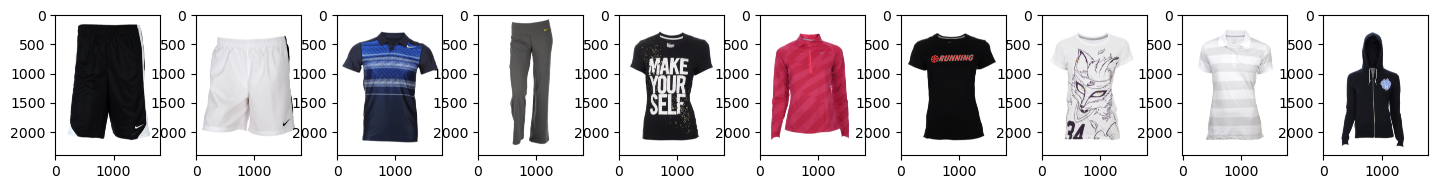

In [ ]:
path = 'C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/'
plt.figure(figsize=(20,20))
for i in range(20,30):
    plt.subplot(6, 10, i-10+1)
    cloth_img =  mpimg.imread(path + 'images/100' + str(i) +'.jpg') # Assign images ids
    plt.imshow(cloth_img)
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

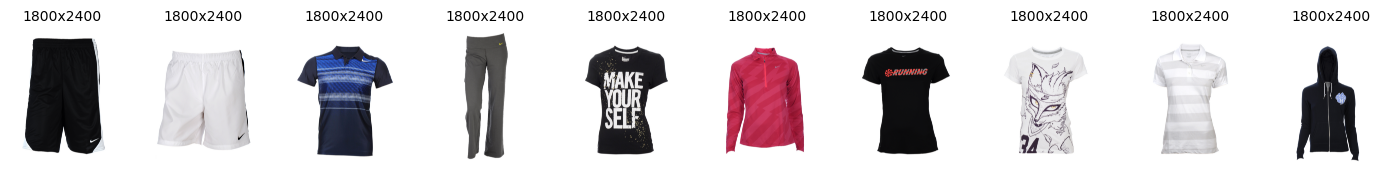

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(20, 30):
    plt.subplot(6, 10, i-10+1)
    img_path = os.path.join(path, 'images', '100' + str(i) + '.jpg')
    cloth_img = mpimg.imread(img_path)  # Assign images ids
    plt.imshow(cloth_img)
    height, width, _ = cloth_img.shape
    plt.title(f'{width}x{height}', fontsize=10)
    plt.axis('off')  # Optional: remove axes for clarity

plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [ ]:
path = 'C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/'
styles_df = pd.read_csv(path + "styles.csv", nrows=6000, on_bad_lines='skip') # Read 6000 product and drop bad lines
styles_df['image'] = styles_df.apply(lambda x: str(x['id']) + ".jpg", axis=1) # Make image column contains (id.jpg)
print(styles_df.shape)
styles_df.head(5)

(6000, 11)


id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

   year   usage                             productDisplayName      image  
0  2011  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012  Casual             Peter England Men Party Blue Jeans  39386.jpg  
2  2016  Casual                       Titan Women Silver Watch  59263.jpg  
3  2011  Casual  Manchester United Men Solid Black Track Pants  21379.jpg  
4  2012  Casual                          Puma Men Grey T-shirt  53759.jpg

In [ ]:
img_width, img_height, chnls = 100, 100, 3

In [ ]:
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalizar la imagen
    return img_array

In [ ]:
path = 'C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/images/'
image_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]

In [ ]:
print(len(image_files))

44441


In [ ]:
efficient_net_model_1 = EfficientNetB1(include_top=False, input_shape=(img_width, img_height, chnls))
# Añadir una capa de agrupamiento global promedio para reducir la dimensionalidad
x = efficient_net_model_1.output
x = GlobalAveragePooling2D()(x)


# Definir el modelo completo que retornará el vector de características
vectorization_model_1 = Model(inputs=efficient_net_model_1.input, outputs=x)

In [ ]:
vectorization_model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 100, 100, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 100, 100, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 100, 100, 3)  0           ['normalization[0][0]']      

In [ ]:
path = 'C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/'

In [ ]:
def img_path(img):
    """ Take image name(id) and return the complete path of it """
    return path + 'images/' + img
def predict(model, img_name):
  """ Load and preprocess image then make prediction """
  # Reshape
  from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Import fix

  img = load_img(img_path(img_name), target_size=(img_width, img_height))
  # img to Array
  img = img_to_array(img)
  # Expand Dim (1, w, h)
  img = np.expand_dims(img, axis=0)
  # Pre process Input
  img = preprocess_input(img)
  return model.predict(img)

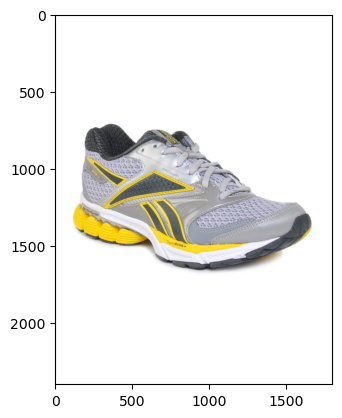

In [ ]:
url="C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/images/10037.jpg"
a = plt.imread(url)
plt.imshow(a)

In [ ]:
sample_img = predict(vectorization_model_1, "10037.jpg")
print(sample_img)

1/1 [==============================] - 4s 4s/step
[[-0.19283363  0.06465789 -0.16779102 ... -0.14701623 -0.18244761
   0.04311953]]


In [ ]:
sample_img.shape

(1, 1280)

**Ahora que ya probamos que la vectorizacion con EfficientNetB1 esta funcionando, ahora apliquemos esta vectorizacion a todas las imagenes**

In [ ]:
path = 'C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/'
features_list = []

# Procesar cada imagen
for img_route in image_files:
    print(img_route)
    img_name = os.path.basename(img_route)
    print(img_name)
    img_path_full = os.path.join(path, img_name)
    print(img_path_full)
    features = predict(vectorization_model_1, str(img_name))
    features_list.append(features)

# Convertir la lista de características a un array numpy
features_array = np.vstack(features_list)

C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/images/10000.jpg
10000.jpg
C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/10000.jpg
1/1 [==============================] - 0s 135ms/step
C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/images/10001.jpg
10001.jpg
C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/10001.jpg
1/1 [==============================] - 0s 82ms/step
C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/images/10002.jpg
10002.jpg
C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/10002.jpg
1/1 [==============================] - 0s 55ms/step
C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/images/10003.jpg
10003.jpg
C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/10003.jpg
1/1 [==============================] - 0s 59ms/step
C:/

In [ ]:
print(len(features_list))

44441


In [ ]:
import pickle
# Guardar la lista en un archivo
#with open('features_list.pkl', 'wb') as f:
    #pickle.dump(features_array, f)

# Cargar la lista desde el archivo
with open('features_list.pkl', 'rb') as f:
    features_array_c = pickle.load(f)

# Imprimir la lista cargada
print(len(features_array_c))

44441


**Ahora usaremos el metodo Annoy para realizar una aproximacion del producto punto de mis imagenes vectorizadas**

In [ ]:
from annoy import AnnoyIndex

In [ ]:
num_features = features_array_c.shape[1]

In [ ]:
# Número de dimensiones de los vectores de características
num_features = features_array_c.shape[1]

# Crear un índice Annoy utilizando la métrica Euclidean (distancia euclidiana)
annoy_index_dot = AnnoyIndex(num_features, 'dot')

# Agregar vectores de características al índice Annoy
for i, feature_vector in enumerate(features_array_c):
    annoy_index_dot.add_item(i, feature_vector)

# Construir el índice Annoy
annoy_index_dot.build(n_trees=10)

# Consultar el índice Annoy para encontrar imágenes similares a una imagen de consulta
query_image_index = 99 # Índice de la imagen de consulta en features_array
num_neighbors = 25  # Número de imágenes similares a recuperar

# Utilizar el índice Annoy para encontrar imágenes similares
similar_image_indices_dot = annoy_index_dot.get_nns_by_item(query_image_index, num_neighbors)

# Imprimir los índices de las imágenes similares
print("Índices de imágenes similares (dot):", similar_image_indices_dot)

Índices de imágenes similares (dot): [99, 35522, 12029, 27443, 9348, 24732, 10479, 26190, 8644, 4837, 8145, 41399, 21532, 12400, 29925, 38434, 3565, 38903, 29930, 18234, 30773, 39513, 8107, 1600, 42259]


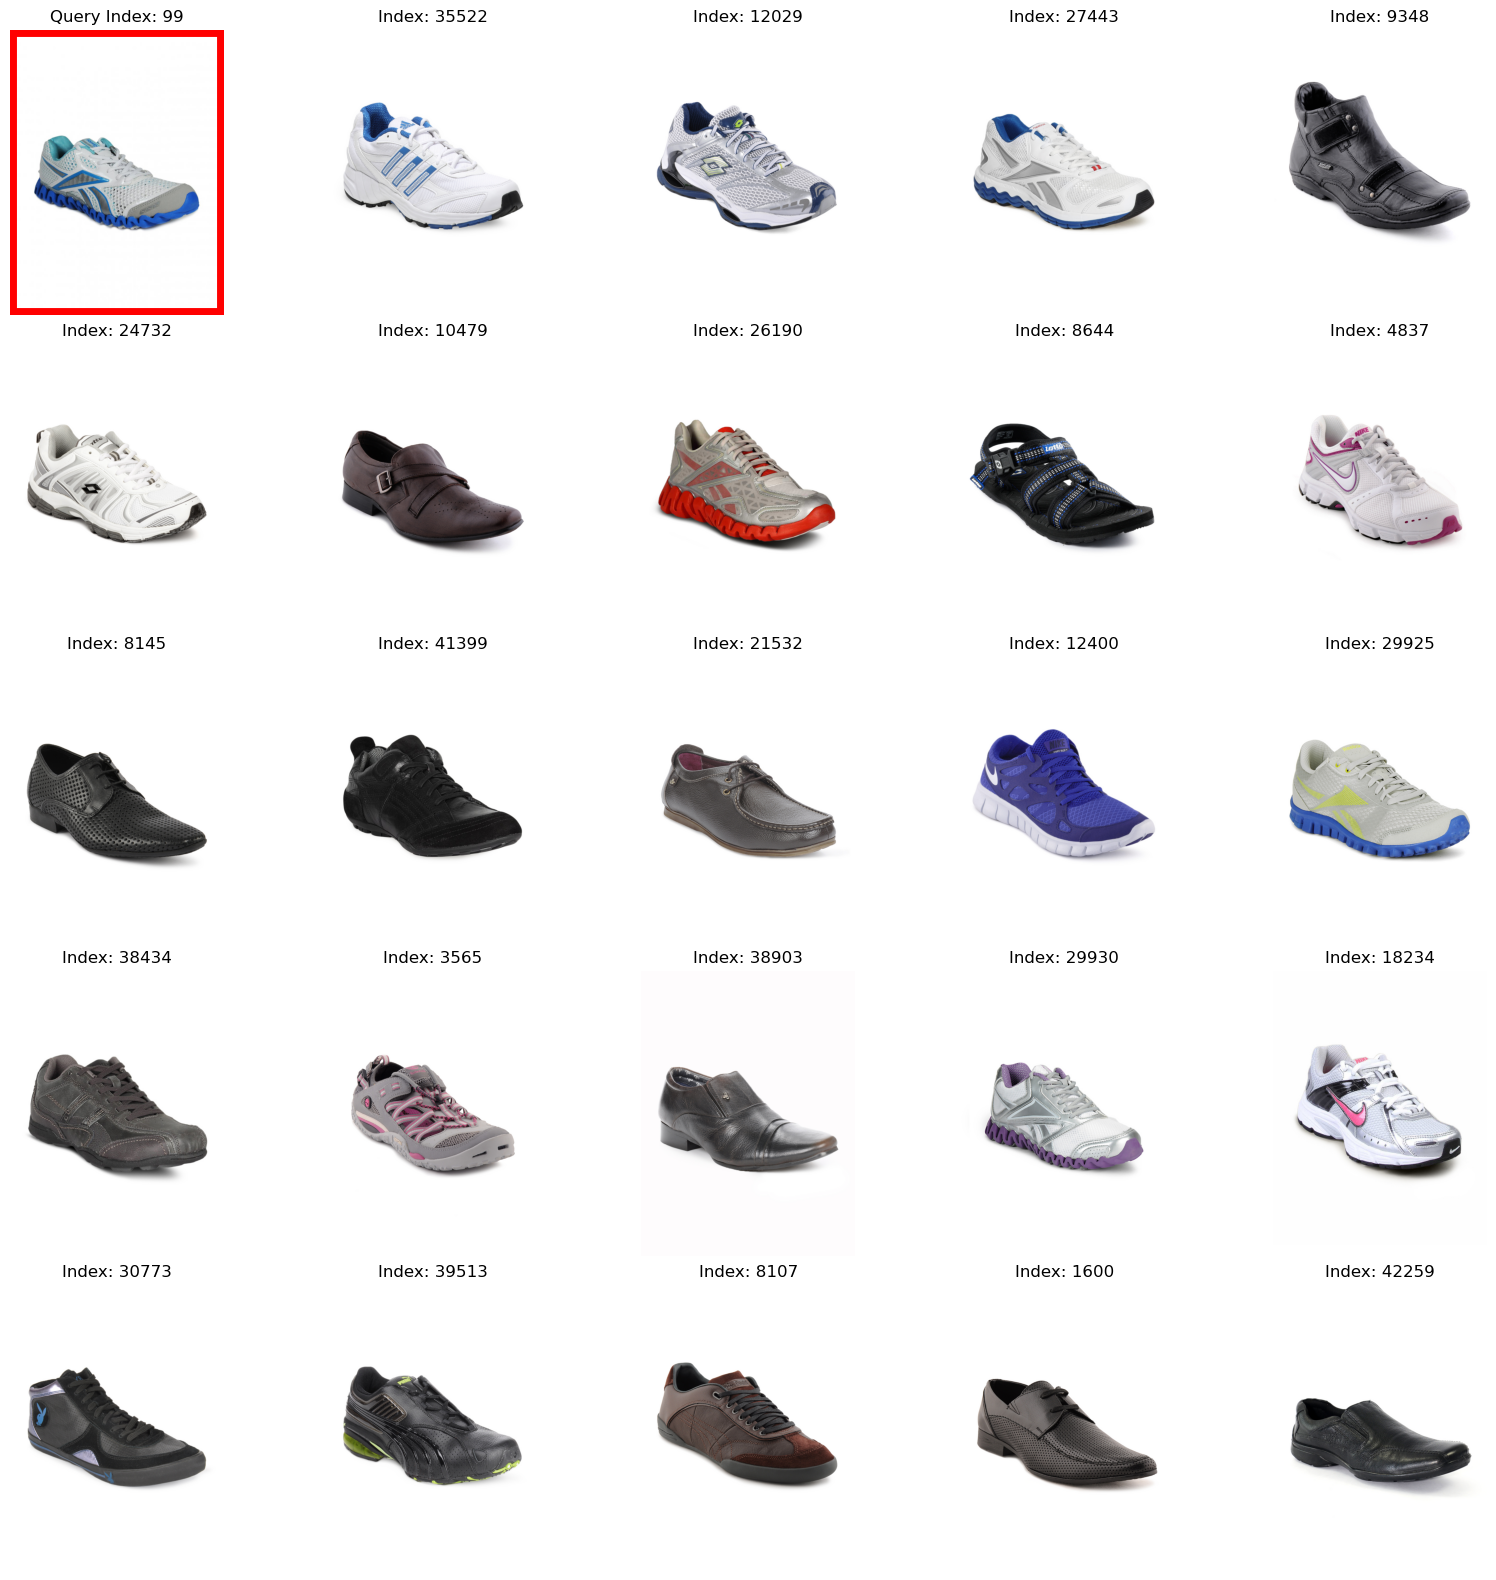

In [ ]:
image_path = 'C:/Users/asus/Documents/Urosario/9 Semestre/Vision_com/Proyecto/fashion-dataset/images/'

# Función para obtener el nombre del archivo de imagen a partir del índice
def get_image_file(index):
    return image_files[index]

# Lista de índices de imágenes similares obtenidas de Annoy
similar_image_indices = similar_image_indices_dot
# Crear una figura para mostrar las imágenes
plt.figure(figsize=(20, 20))

# Graficar la imagen de consulta en la posición central (3, 3) de una cuadrícula 5x5
for i, img_index in enumerate(similar_image_indices):
    plt.subplot(5, 5, i + 1)  # Crear una cuadrícula de 5x5
    img_file = get_image_file(img_index)
    img = mpimg.imread(os.path.join(image_path, img_file))

    if img_index == query_image_index:
        plt.imshow(img, cmap='gray')
        plt.title(f'Query Index: {img_index}')
        plt.gca().add_patch(plt.Rectangle((0, 0), img.shape[1], img.shape[0], linewidth=10, edgecolor='red', facecolor='none'))
    else:
        plt.imshow(img)
        plt.title(f'Index: {img_index}')

    plt.axis('off')  # Opcional: eliminar los ejes para mayor claridad

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()